# Finding the position and velocity vectors of Kepler and TESS

`lkspacecraft` uses SPICE kernels to track the position and velocity of spacecraft as measured. You can use `lkspacecraft` to get those vectors and use them in your analyses.

In [9]:
from lkspacecraft import KeplerSpacecraft, TESSSpacecraft
import matplotlib.pyplot as plt
from astropy.time import Time
import numpy as np

First we load the spacecraft object

In [3]:
ks = KeplerSpacecraft()

Now we must pick a time that we want to get the position or velocity. I will create a vector which spans the duration of the SPICE kernels

In [13]:
start, end = ks.start_time, ks.end_time

In [14]:
start, end

(<Time object: scale='utc' format='datetime' value=2009-03-07 06:22:56.000025>,
 <Time object: scale='utc' format='datetime' value=2019-12-29 23:58:50.815000>)

In [15]:
t = Time(np.linspace(start.jd + 1, end.jd - 1, 5000), format='jd')

`t` is now an `astropy.time.Time` object with 5000 points, uniformly spaced from the start of the SPICE kernel time range, to the end. Let's get the spacecraft position

In [20]:
position = ks.get_spacecraft_position(t)

In [21]:
position

array([[-1.45655156e+08,  2.97198666e+07,  1.29558452e+07],
       [-1.46213473e+08,  2.79120935e+07,  1.22113036e+07],
       [-1.46731907e+08,  2.60956672e+07,  1.14574009e+07],
       ...,
       [ 1.42658205e+08,  4.11705906e+07,  1.69873529e+07],
       [ 1.41985041e+08,  4.29469537e+07,  1.77452295e+07],
       [ 1.41285566e+08,  4.47155773e+07,  1.84999128e+07]])

This is the position in *km*, in Cartesian coordinates.

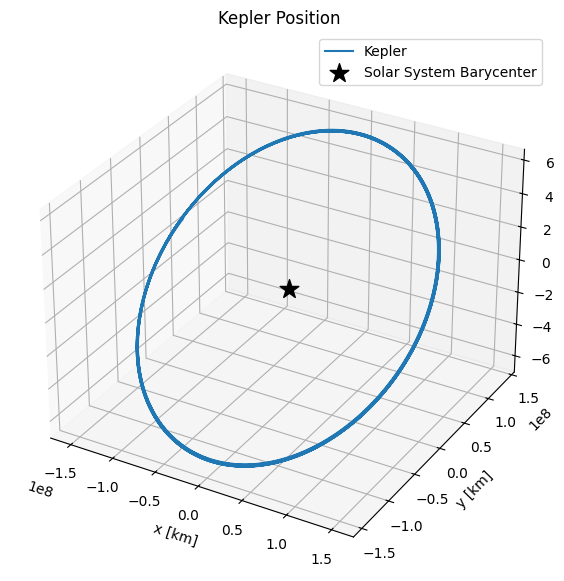

In [30]:
fig = plt.figure(figsize=(7, 7))
ax  = fig.add_subplot(111, projection='3d')
ax.plot(*position.T, label='Kepler')
ax.scatter(0, 0, 0, label='Solar System Barycenter', c='k', marker='*', s=200)
ax.set(title='Kepler Position', xlabel='x [km]', ylabel='y [km]', zlabel='z [km]')
ax.legend();

Looks great! We can do the same with velocity

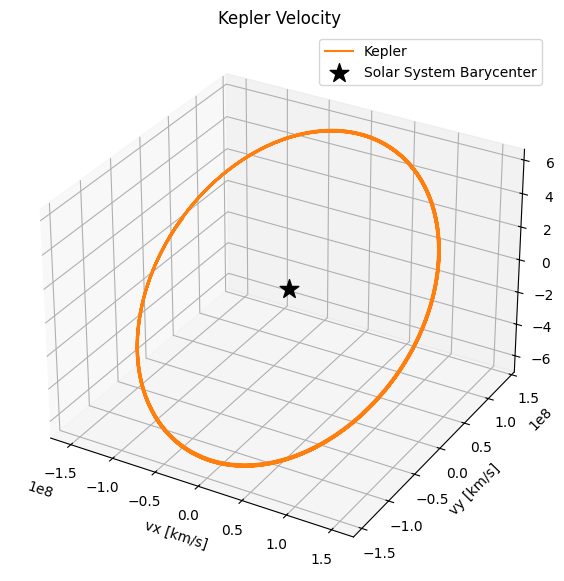

In [33]:
velocity = ks.get_spacecraft_position(t)

fig = plt.figure(figsize=(7, 7))
ax  = fig.add_subplot(111, projection='3d')
ax.plot(*velocity.T, label='Kepler', c='C1')
ax.scatter(0, 0, 0, label='Solar System Barycenter', c='k', marker='*', s=200)
ax.set(title='Kepler Velocity', xlabel='vx [km/s]', ylabel='vy [km/s]', zlabel='vz [km/s]')
ax.legend();

Let's try the same thing with TESS

In [50]:
ts = TESSSpacecraft()
t = Time(np.linspace(ts.start_time.jd + 500, ts.end_time.jd - 1, 5000), format='jd')

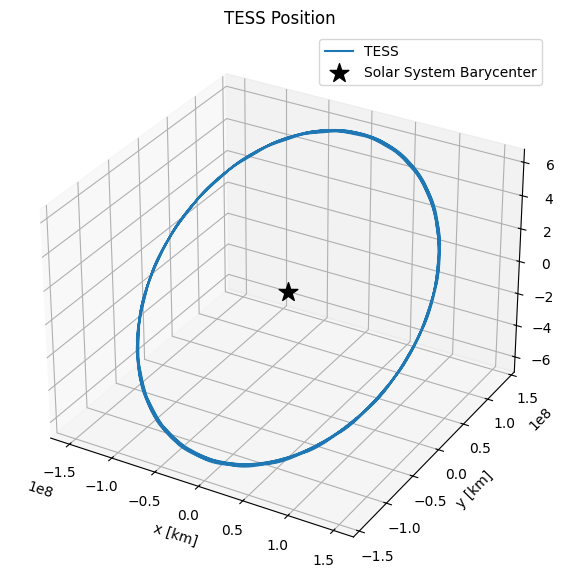

In [52]:
position = ts.get_spacecraft_position(t)

fig = plt.figure(figsize=(7, 7))
ax  = fig.add_subplot(111, projection='3d')
ax.plot(*position.T, label='TESS')
ax.scatter(0, 0, 0, label='Solar System Barycenter', c='k', marker='*', s=200)
ax.set(title='TESS Position', xlabel='x [km]', ylabel='y [km]', zlabel='z [km]')
ax.legend();